# Maths of SVM

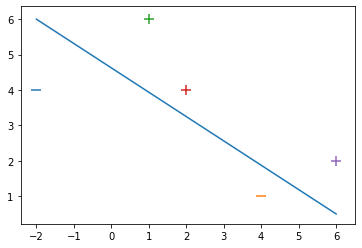

In [32]:
import numpy as np
#to plot our data and model visually
from matplotlib import pyplot as plt
%matplotlib inline

#Step 1 - Define our data

#Input data - Of the form [X value, Y value, Bias term]
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

#Associated output labels - First 2 examples are labeled '-1' and last 3 are labeled '+1'
y = np.array([-1,-1,1,1,1])

#lets plot these examples on a 2D graph!
#for each example
for d, sample in enumerate(X):
    # Plot the negative samples (the first 2)
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples (the last 3)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
#we'll two points and draw the line between them (naive guess)
plt.plot([-2,6],[6,0.5])

In [36]:
def svmSgdPlot(X,Y):
    w = np.zeros(len(X[0]))
    #learning rate
    eta = 2
    #iterations to train
    epochs =10000
    errors = []  #store the miss classification
    
    for epoch in range(1, epochs):
        #missclassification
        
        error = 0;
        for i, x in enumerate(X):
            if(Y[i] * np.dot(X[i], w)) < 1:
                w = w+eta * ((X[i] * Y[i]) + (-2 * (1/epoch) * w))
                error=1
            else:
                #correct classifcation
                w = w+ eta * (-2 * (1/epoch)* w)
        errors.append(error)
        
    #plot the rate of classification error
    plt.plot(errors, '|')
    plt.ylim(0.5, 1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel ('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
    return w

In [41]:
wNew = svmSgdPlot(X,y)


TypeError: object of type 'numpy.float64' has no len()

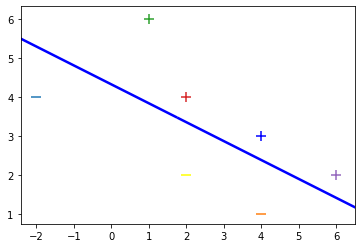

In [35]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by svm_sgd()
x2=[wNew[0],wNew[1],-wNew[1],wNew[0]]
x3=[wNew[0],wNew[1],wNew[1],-wNew[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')

# SVM Classifier

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [3]:
iris = datasets.load_iris()

In [4]:
x = iris["data"][:,(2,3)]  #petal lenght, width
y = (iris["target"]==2).astype(np.float64)  #iris verginica

In [5]:
svmClf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss = "hinge")),
])

In [6]:
svmClf.fit(x,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [7]:
#predict
svmClf.predict([[5.5, 1.7]])

array([1.])

In [9]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline([
("poly_features", PolynomialFeatures(degree=3)),
("scaler", StandardScaler()),
("svm_clf", LinearSVC(C=10, loss="hinge"))
])
polynomial_svm_clf.fit(x, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)